### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 6.1:</span> Modello di Ising 1D: algoritmo di Metropolis e algoritmo di Gibbs

Si vuole studiare il modello di Ising 1D, ovvero un sistema di $N$ spin, che interagiscono solo tra primi vicini, secondo l'Hamiltoniana: 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
ponendosi in un sistema di unità naturali per cui $\mu_B=1$ e $k_B=1$, con $J>0$.

Inoltre, le variabili di spin assumono i valori $s_i=\pm1$ ed $s_{N+1}=s_1$ (condizioni al contorno periodiche).  

La _funzione di partizione_ per il sistema di $N$ spin risulta quindi essere

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

dove
$\hspace{2cm}\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2} \hspace{2cm}\beta=\frac{1}{k_b T} = \frac{1}{T}$.

### Andamenti analitici esatti
A partire da questa, grazie alla fisica statistica, è possibile ricavarsi _analiticamente_ tutte le quantità termodinamiche di nostro interesse, in funzione della temperatura $T$:
1. Energia interna per spin (campo magnetico esterno $h=0$)
$$
\frac{U(N,T)}{N} =-\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh(\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
2. Capacità termica per spin (campo magnetico esterno $h=0$)
$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$
nota: la capacità termica, che rappresenta una capacità di risposta della U al variare della T, è proporzionale alle fluttuazioni quadratiche dell'energia.
3. Suscettività magnetica (campo magnetico esterno $h=0$)
$$
\chi(N,T) = \frac{\partial M}{\partial h}\underset{h=0}=  \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
4. Magnetizzazione per spin (campo magnetico esterno $h\neq 0$)
$$
\frac{M(N,T,h)}{N}=\frac{ k_B T}{N}\frac{\partial \ln Z}{\partial h} = \frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$
nota: se $h$ fosse nullo lo sarebbe anche la magnetizzazione.

### Simulazione
Sono stati aggiunti al codice fornito gli algoritmi di sampling, che ad ogni mossa tentano di agire su un determinato spin nelle seguenti modalità:
- Metropolis propone, con probabilità pari al peso di Boltzmann $p=\exp{(-\beta \Delta E)}$, ad uno spin selezionato casualmente di invertirsi ($s_i \rightarrow -s_i$).
- Gibbs propone, con probabilità pari a $p=\left[1+\exp{(-2\beta (J(s_{o-1}+s_{o+1})+h))}\right]^{-1}$, ad uno spin selezionato casualmente di assumere il valore $+1$, indipendentemente dal suo valore iniziale (se il confronto con la probabilità fallisce, lo spin selezionato assume valore $-1$).

Le quantità termodinamiche sono quindi state campionate come
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

per un sistema di $N=50$ spin, posto $J=1$.

Vengono prese in considerazione 21 temperature (si effettua la simulazione 21 volte per ciascun algoritmo) con $T\in [0.5;2.0]$

#### Equilibrazione
Scegliendo come configurazione iniziale di porre gli spin tutti up (bassa entropia), si pone attenzione a non dimenticare il tempo di equilibrazione, ovvero aspettare che il sistema si assesti - alla temperatura richiesta - prima di misurare quantità termodinamiche.

Si usa, come di consueto, il metodo del data blocking per avere informazione sull'incertezza statistica dei valori ottenuti, riportati e confrontati con gli andamenti analitici nei seguenti grafici.

## <span style="color:blue"> GRAFICO A) </span> Energia interna in funzione della temperatura

Energia interna per spin $\frac{U}{N}$, con algoritmi di Metropolis e Gibbs, campionata in 21 temperature $T \in [0.5, 2.0]$, con campo esterno $h=0$.

Per evidenziare l'ordine di grandezza della differenza tra i valori ottenuti in simulazione con quelli dell'andamento analitico, si sono creati i due appositi grafici.

<IPython.core.display.Javascript object>


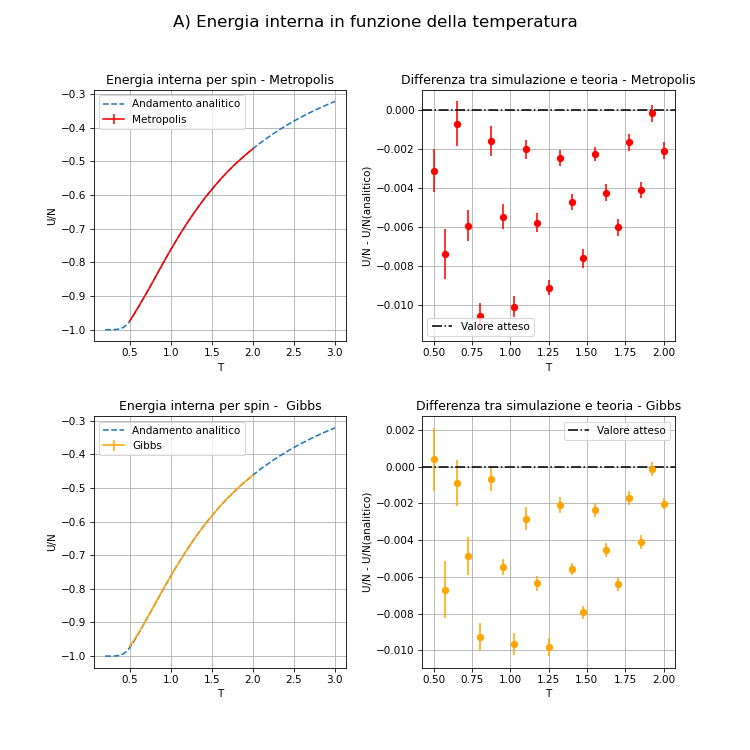

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dai file
data = np.loadtxt("M.output.ene.0")
dataG = np.loadtxt("G.output.ene.0")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico (andamento analitico)
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("A) Energia interna in funzione della temperatura", fontsize=16)  # Titolo generale

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#METROPOLIS
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, e, linestyle='--', label='Andamento analitico')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metropolis')
axs[0,0].set_title('Energia interna per spin - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel("U/N")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - e[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o', color='red')
axs[0,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[0,1].set_title('Differenza tra simulazione e teoria - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel("U/N - U/N(analitico)")
axs[0,1].legend()


# GIBBS
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, e,linestyle='--', label='Andamento analitico')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Energia interna per spin -  Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("U/N")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - e[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o', color='orange')
axs[1,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[1,1].set_title('Differenza tra simulazione e teoria - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel("U/N - U/N(analitico)")
axs[1,1].legend()

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()

## <span style="color:green"> GRAFICO B) </span> Capacità termica in funzione della temperatura

Capacità termica per spin $\frac{C}{N}$, con algoritmi di Metropolis e Gibbs, campionata in 21 temperature $T \in [0.5, 2.0]$, con campo esterno $h=0$.

Per evidenziare l'ordine di grandezza della differenza tra i valori ottenuti in simulazione con quelli dell'andamento analitico, si sono creati i due appositi grafici.

<IPython.core.display.Javascript object>


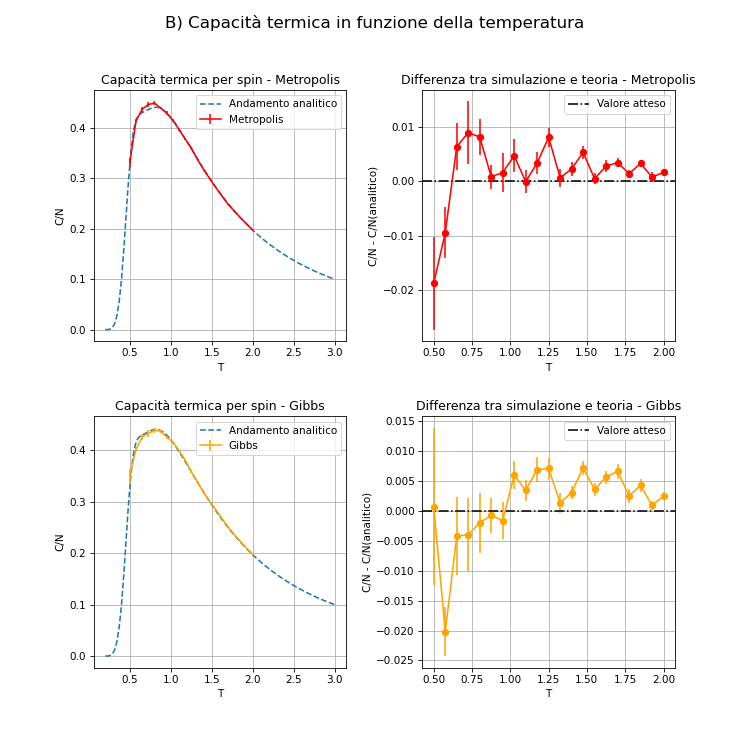

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dal file
data = np.loadtxt("M.output.heat.0")
dataG = np.loadtxt("G.output.heat.0")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico (andamento analitico)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("B) Capacità termica in funzione della temperatura", fontsize=16)  # Titolo generale

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#METROPOLIS
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, heat,linestyle='--', label='Andamento analitico')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metropolis')
axs[0,0].set_title('Capacità termica per spin - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel("C/N")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - heat[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o-', color='red')
axs[0,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[0,1].set_title('Differenza tra simulazione e teoria - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel("C/N - C/N(analitico)")
axs[0,1].legend()


# Gibbs
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, heat,linestyle='--', label='Andamento analitico')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Capacità termica per spin - Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("C/N")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - heat[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o-', color='orange')
axs[1,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[1,1].set_title('Differenza tra simulazione e teoria - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel("C/N - C/N(analitico)")
axs[1,1].legend()

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()

## <span style="color:pink"> GRAFICO C) </span> Suscettività magnetica in funzione della temperatura

Suscettività magnetica $\chi$, con algoritmi di Metropolis e Gibbs, campionata in 21 temperature $T \in [0.5, 2.0]$, con campo esterno $h=0$.

Per evidenziare l'ordine di grandezza della differenza tra i valori ottenuti in simulazione con quelli dell'andamento analitico, si sono creati i due appositi grafici.

<IPython.core.display.Javascript object>


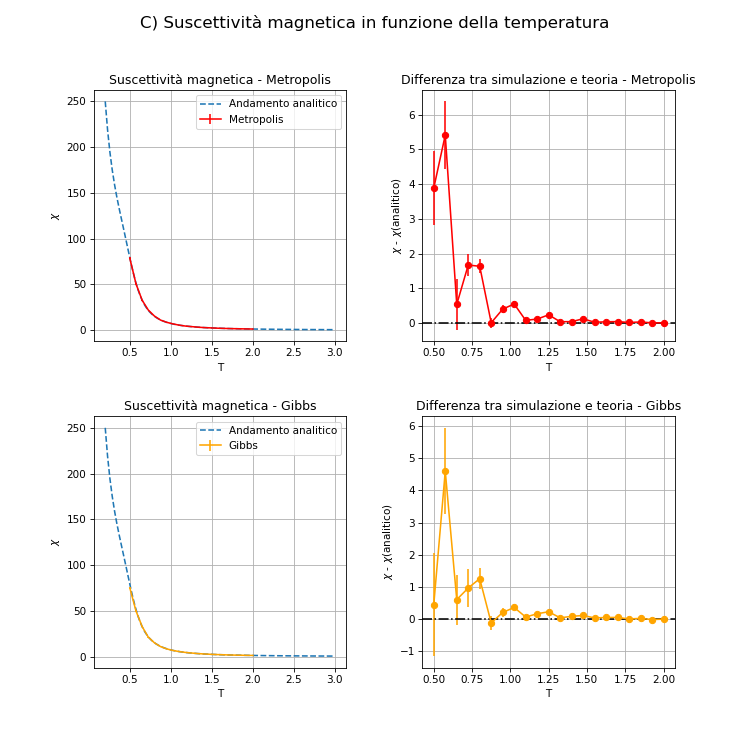

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dal file
data = np.loadtxt("M.output.chi.0")
dataG = np.loadtxt("G.output.chi.0")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico (andamento analitico)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("C) Suscettività magnetica in funzione della temperatura", fontsize=16)  # Titolo generale

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Metropolis
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, X, linestyle='--',label='Andamento analitico')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metropolis')
axs[0,0].set_title('Suscettività magnetica - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel(r"$\chi$")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - X[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o-', color='red')
axs[0,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[0,1].set_title('Differenza tra simulazione e teoria - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel(r"$\chi$ - $\chi$(analitico)")


# Gibbs
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, X, linestyle='--',label='Andamento analitico')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Suscettività magnetica - Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel(r"$\chi$")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - X[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o-', color='orange')
axs[1,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[1,1].set_title('Differenza tra simulazione e teoria - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel(r"$\chi$ - $\chi$(analitico)")

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()

## <span style="color:purple"> GRAFICO D) </span> Magnetizzazione per spin in funzione della temperatura

Magnetizzazione per spin $\frac{M}{N}$, con algoritmi di Metropolis e Gibbs, campionata in 21 temperature $T \in [0.5, 2.0]$, con campo esterno $h=0.02$.

Per evidenziare l'ordine di grandezza della differenza tra i valori ottenuti in simulazione con quelli dell'andamento analitico, si sono creati i due appositi grafici.

<IPython.core.display.Javascript object>


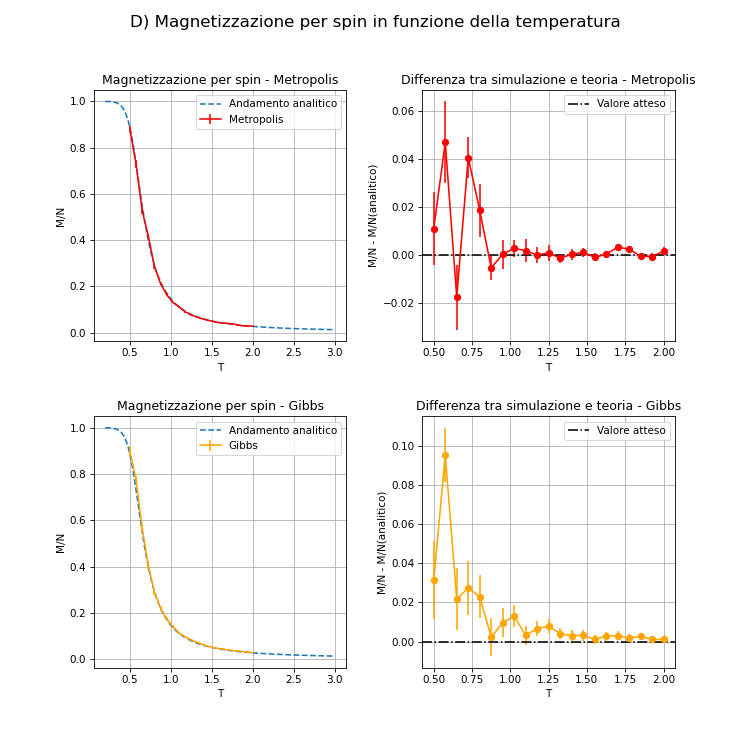

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dal file
data = np.loadtxt("M.output.mag.0,02")
dataG = np.loadtxt("G.output.mag.0,02")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("D) Magnetizzazione per spin in funzione della temperatura", fontsize=16)  # Titolo generale

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Metropolis
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, M, linestyle='--',label='Andamento analitico')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metropolis')
axs[0,0].set_title('Magnetizzazione per spin - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel("M/N")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - M[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o-', color='red')
axs[0,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[0,1].set_title('Differenza tra simulazione e teoria - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel("M/N - M/N(analitico)")
axs[0,1].legend()


# Gibbs
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, M, linestyle='--', label='Andamento analitico')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Magnetizzazione per spin - Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("M/N")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - M[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o-', color='orange')
axs[1,1].axhline(y=0, color='black', linestyle='-.', label='Valore atteso')
axs[1,1].set_title('Differenza tra simulazione e teoria - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel("M/N - M/N(analitico)")
axs[1,1].legend()

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()